# **K-Nearest Neighbors (KNN) Classification on the Titanic Dataset**

In this notebook, we'll walk through performing k‑nearest neighbors (KNN) classification using the Titanic dataset. We will follow these steps:

1. **Load and Inspect the Data:** Import and examine the dataset.
2. **Preprocess the Data:** Handle missing values and encode categorical variables.
3. **Split the Data:** Divide the dataset into training and testing sets.
4. **Evaluate KNN Without Scaling:** Train and evaluate the KNN model on the original (unscaled) data.
5. **Scale the Data:** Apply feature scaling.
6. **Evaluate KNN With Scaling:** Re-run the model using the scaled data to see the improvement.
7. **Explore the Effect of Different k Values:** Analyze how varying the number of neighbors affects performance.

## Step 1: Load and Inspect the Data

We begin by importing the necessary libraries and loading the Titanic dataset using seaborn. This lets us inspect the dataset structure and identify any issues before modeling.

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Display the first five rows of the dataset
print("First five rows of the Titanic dataset:")
print(df.head())

First five rows of the Titanic dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


## Step 2: Preprocess the Data

Before training our model, we need to clean and prepare the dataset:
- **Handling Missing Values:** Remove rows with missing 'age' values so that the model is trained on complete data.
- **Encoding Categorical Variables:** Convert categorical variables like 'sex' into numerical values using one-hot encoding (dropping the first category to avoid multicollinearity).

Finally, we define our feature set and the target variable.

In [8]:
# Remove rows with missing 'age' values to ensure a clean dataset
df.dropna(subset=['age'], inplace=True)

# Encode the 'sex' column into a numeric format using one-hot encoding.
# The drop_first parameter is set to True to avoid multicollinearity.
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

# Define the features and target variable
features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male']
X = df[features]
y = df['survived']

# Preview the cleaned features and target
print("Features preview:")
print(X.head())
print("\nTarget preview:")
print(y.head())

Features preview:
   pclass   age  sibsp  parch     fare  sex_male
0       3  22.0      1      0   7.2500      True
1       1  38.0      1      0  71.2833     False
2       3  26.0      0      0   7.9250     False
3       1  35.0      1      0  53.1000     False
4       3  35.0      0      0   8.0500      True

Target preview:
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


## Step 3: Split the Data

We split the dataset into training and testing subsets:
- **Training Set (80%):** Used to fit the k‑nearest neighbors model.
- **Testing Set (20%):** Used to evaluate the model’s performance.

A random state is set to ensure reproducibility.

In [9]:
from sklearn.model_selection import train_test_split

# Split the dataset: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

## Step 4: Train the K-Nearest Neighbors Model

KNN is a non‑parametric, instance-based learning algorithm. It classifies a new data point by:
- Calculating the distance between the new data point and all points in the training set.
- Identifying the 'k' nearest neighbors.
- Assigning the class that is most common among these neighbors.

In this example, we initialize our KNN classifier with `k=5` (i.e., considering the 5 nearest neighbors) and train it using the training data.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with k=5 neighbors
knn = KNeighborsClassifier(n_neighbors=5, metric = "euclidean")
# Train the model using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

## Step 5: Evaluate the Model

To assess the performance of our KNN model, we will use the following metrics:
- **Accuracy:** The overall proportion of correct predictions.
- **Confusion Matrix:** A table that compares the actual labels with those predicted by the model.
- **Classification Report:** Provides precision, recall, and F1-score for each class.

We begin by predicting the labels for the test data and then compute these evaluation metrics.

Accuracy with k=5: 0.65


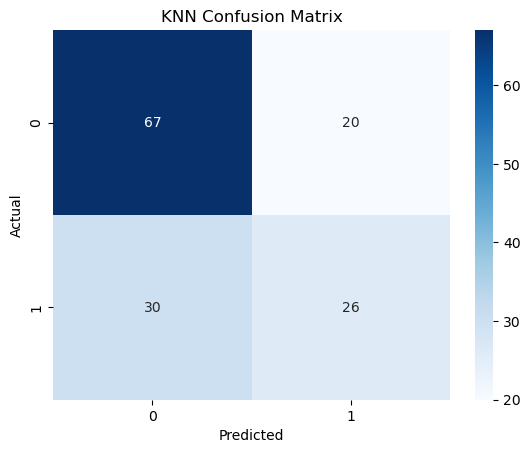


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        87
           1       0.57      0.46      0.51        56

    accuracy                           0.65       143
   macro avg       0.63      0.62      0.62       143
weighted avg       0.64      0.65      0.64       143



In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict the labels for the test dataset
y_pred = knn.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k=5: {accuracy:.2f}")

# Generate the confusion matrix and display it using a heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the classification report with detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

## Step 6: Scale the Data

Since KNN is sensitive to the scale of the features, scaling can often lead to a substantial improvement in performance. Here, we use the StandardScaler to:
- Standardize the features so that they have a mean of 0 and a standard deviation of 1.
- Apply the transformation to both the training and testing data (using the training data to fit the scaler to avoid data leakage).

After scaling, we will re-run the KNN model.

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: Convert the scaled training data back to a DataFrame for inspection
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
print("Scaled training features preview:")
print(X_train_scaled_df.head())

Scaled training features preview:
       pclass       age     sibsp     parch      fare  sex_male
328  0.928168  0.066803  0.585495  0.646804 -0.293819 -1.326067
73   0.928168 -0.272964  0.585495 -0.507337 -0.416381  0.754110
253  0.928168 -0.001151  0.585495 -0.507337 -0.383155  0.754110
719  0.928168  0.202709 -0.547785 -0.507337 -0.551227  0.754110
666 -0.265489 -0.340917 -0.547785 -0.507337 -0.445740  0.754110


## Step 7: Evaluate KNN With Scaling

Now that we have scaled the features, we re-run the KNN model on the scaled data. We will use the same settings (k=5) to see how scaling affects the performance:
- Training the model on the scaled training set.
- Evaluating on the scaled test set with accuracy, confusion matrix, and a classification report.

Accuracy with scaling (k=5): 0.78


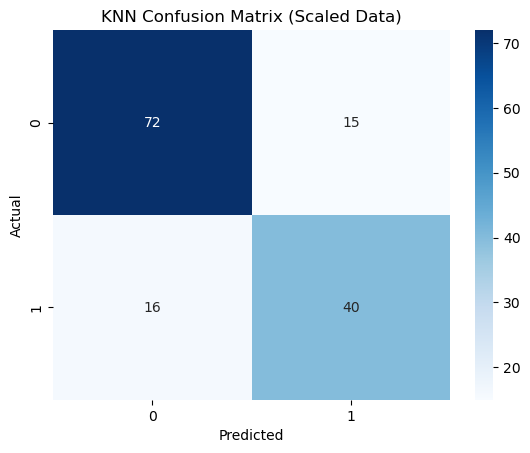


Classification Report (Scaled Data):
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        87
           1       0.73      0.71      0.72        56

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



In [22]:
# Initialize and train the KNN classifier with k=5 neighbors on the scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=7)
knn_scaled.fit(X_train_scaled, y_train)

# Predict the labels for the scaled test data
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Calculate and print the accuracy for the scaled data
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with scaling (k=5): {accuracy_scaled:.2f}")

# Generate and display the confusion matrix for the scaled data using a heatmap
cm_scaled = confusion_matrix(y_test, y_pred_scaled)
sns.heatmap(cm_scaled, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix (Scaled Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the classification report for the scaled data
print("\nClassification Report (Scaled Data):")
print(classification_report(y_test, y_pred_scaled))

## Step 8: Explore the Effect of Different k Values (Scaled Data)

The performance of KNN can vary significantly with the choice of `k`. In this final step, we will:
- Vary `k` from 1 to 20, odds only.
- Train a KNN model for each `k` using the scaled data.
- Plot the accuracy on the test set as a function of `k`.

This analysis will help illustrate the impact of different neighborhood sizes on the model's performance when the data is scaled.

<function matplotlib.pyplot.show(close=None, block=None)>

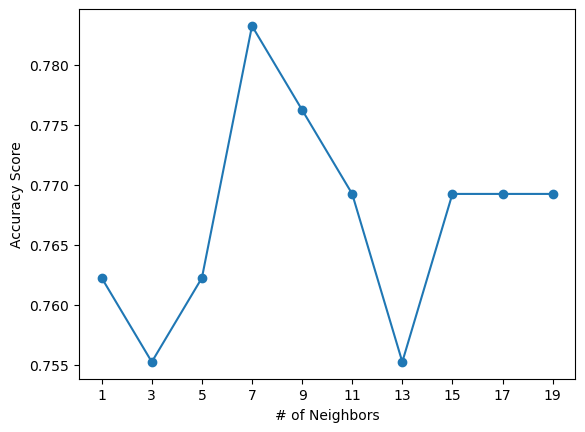

In [21]:
# Define a range of k values to explore for all odd numbers
k_values = range(1,21,2)
accuracies_scaled = []

# Loop through different values of k, train a KNN model on scaled data, and record the accuracy for each
for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors= k)
    knn_temp.fit(X_train_scaled, y_train)
    y_temp_pred = knn_temp.predict(X_test_scaled)
    accuracies_scaled.append(accuracy_score(y_test, y_temp_pred))

# Plot accuracy vs. number of neighbors (k) for the scaled data
plt.plot(k_values, accuracies_scaled, marker = 'o')
plt.xlabel("# of Neighbors")
plt.ylabel("Accuracy Score")
plt.xticks(k_values)
plt.show